# The Famous Four

In [50]:
'''Dian Wulandari & Rebecca Peake'''
'''Our Magnificent Computing Project on Ising Model'''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand

N = 10
temp = 1

lattice = 2*np.random.randint(2, size=(N,N))-1
print ('this is the non fancy schamncy lattice showing random spins \n')
print (lattice)

this is the non fancy schamncy lattice showing random spins 

[[ 1  1  1 -1 -1 -1 -1 -1  1  1]
 [ 1  1 -1 -1 -1  1  1  1  1  1]
 [-1  1  1  1 -1  1  1  1  1  1]
 [ 1 -1  1 -1  1 -1 -1  1 -1  1]
 [ 1  1  1  1 -1  1 -1 -1 -1  1]
 [ 1  1  1 -1  1 -1 -1 -1  1  1]
 [ 1 -1  1  1 -1  1 -1 -1 -1  1]
 [-1  1  1  1 -1 -1 -1  1  1 -1]
 [ 1  1  1  1 -1 -1  1  1 -1 -1]
 [ 1  1  1 -1 -1  1 -1  1 -1 -1]]


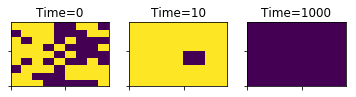

In [51]:
# print (lattice)

class Seymour():
      
    ## this is the metropolis-schmolis bit
    def metropolis(self, lattice, N, beta):
        for i in range(N):
            for j in range(N): 
                    # setting the random location within lattice where we'll do the flippin wippin            
                    row = np.random.randint(0, N)
                    col = np.random.randint(0, N)
                    s =  lattice[row, col] 
                    
                    # not a a torus yet but don't judge, it's an ugly trait. I just can't cope with too much conditionals
                    # and loops for the time being.
                    flip = lattice[(row+1)%N,col] + lattice[row,(col+1)%N] + lattice[(row-1)%N,col] + lattice[row,(col-1)%N]
                    deltaE = 2*s*flip
                    if deltaE < 0:
                        s *= -1
                    elif rand() < np.exp(-deltaE*beta):
                        s *= -1
                    lattice[row, col] = s
        # print (lattice)
        return lattice 
       
    def visualise(self):   
        f = plt.figure()  
        self.latticePlot(f, lattice, 0, N, 1);
     
        for i in range(1001):
            self.metropolis(lattice, N, 1.0/temp)
            if i == 10:      self.latticePlot(f, lattice, i, N, 2);
            if i == 1000:     self.latticePlot(f, lattice, i, N, 3);
        
                    
    def latticePlot(self, f, lattice, i, N, n_):
      
        X, Y = np.meshgrid(range(N), range(N))
        sp =  f.add_subplot(3, 3, n_ )  
        plt.setp(sp.get_yticklabels(), visible=False)
        plt.setp(sp.get_xticklabels(), visible=False)      
        plt.pcolormesh(X, Y, lattice, cmap=plt.cm.viridis);
        plt.title('Time=%d'%i); plt.axis('tight')    
    plt.show()

go = Seymour()
go.visualise()

In [52]:
print ('This is what the spin arrangement of the final lattice should look like - so help me God \n')
print (lattice)


This is what the spin arrangement of the final lattice should look like - so help me God 

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


In [53]:
# copy the metropolis function because the one from earlier is in a class
def metropolis(lattice, beta):
        for i in range(N):
            for j in range(N): 
                    # setting the random location within lattice where we'll do the flippin wippin            
                    row = np.random.randint(0, N)
                    col = np.random.randint(0, N)
                    s =  lattice[row, col] 
                    
                    flip = lattice[(row+1)%N,col] + lattice[row,(col+1)%N] + lattice[(row-1)%N,col] + lattice[row,(col-1)%N]
                    deltaE = 2*s*flip
                    if deltaE < 0:
                        s *= -1
                    elif rand() < np.exp(-deltaE*beta):
                        s *= -1
                    lattice[row, col] = s
        return lattice #run!

In [54]:
#function to sum up total energy expenditure after some flippin-heckin...
def EofLat(lattice):
    energy = 0
    for i in range(len(lattice)):
        for j in range(len(lattice)):
            S = lattice[i,j] #start from beginning
            change = lattice[(i+1)%N, j] + lattice[i,(j+1)%N] + lattice[(i-1)%N, j] + lattice[i,(j-1)%N]
            energy += -change*S
    return energy/4

def calcMag(lattice):
    mag = np.sum(lattice)
    return mag


In [55]:
def initialstate(N):
    lattice = 2*np.random.randint(2, size=(N,N))-1
    return lattice

In [56]:
'''this cell takes over 5 minutes to run on Dian's computer. Don't rerun unless you are sure.'''

# I know I can loop this, but copy-paste is less emotionally taxing
N = 2
points = 50
eqiter = 1000
metroiter = 1000
#Temperature
T = np.linspace(0.01, 6, points)
E2 = np.zeros(points)
M2 = np.zeros(points)
C2 = np.zeros(points)
S2 = np.zeros(points)

neq = 1.0/(metroiter*N*N)
nmetro = 1.0/(metroiter*metroiter*N*N)

for temp in range (points):
    En1 = Mag1 = En2 = Mag2 = 0
    lattice = initialstate(N)
    iT=1.0/T[temp]; iT2=iT*iT;
    
    for i in range (eqiter):
        metropolis (lattice, iT)
    
    for i in range (metroiter):
        metropolis (lattice, iT)
        Ene = EofLat(lattice)
        Mag = calcMag(lattice)
        
        En1 = En1 + Ene
        Mag1 = Mag1 + Mag
        Mag2 = Mag2 + Mag*Mag
        En2 = En2 + Ene*Ene
    
    E2[temp] = neq*En1
    M2[temp] = neq*Mag1
    C2[temp] = (neq*En2 - nmetro*En1*En1)*iT2
    S2[temp] = (neq*Mag2 - nmetro*Mag1*Mag1)*iT


N = 4
points = 50
eqiter = 1000
metroiter = 1000
#Temperature
T = np.linspace(0.01, 6, points)
E4 = np.zeros(points)
M4 = np.zeros(points)
C4 = np.zeros(points)
S4 = np.zeros(points)

neq = 1.0/(metroiter*N*N)
nmetro = 1.0/(metroiter*metroiter*N*N)

for temp in range (points):
    En1 = Mag1 = En2 = Mag2 = 0
    lattice = initialstate(N)
    iT=1.0/T[temp]; iT2=iT*iT;
    
    for i in range (eqiter):
        metropolis (lattice, iT)
    
    for i in range (metroiter):
        metropolis (lattice, iT)
        Ene = EofLat(lattice)
        Mag = calcMag(lattice)
        
        En1 = En1 + Ene
        Mag1 = Mag1 + Mag
        Mag2 = Mag2 + Mag*Mag
        En2 = En2 + Ene*Ene
    
    E4[temp] = neq*En1
    M4[temp] = neq*Mag1
    C4[temp] = (neq*En2 - nmetro*En1*En1)*iT2
    S4[temp] = (neq*Mag2 - nmetro*Mag1*Mag1)*iT

N = 8
points = 50
eqiter = 1000
metroiter = 1000
#Temperature
T = np.linspace(0.01, 6, points)
E8 = np.zeros(points)
M8 = np.zeros(points)
C8 = np.zeros(points)
S8 = np.zeros(points)

neq = 1.0/(metroiter*N*N)
nmetro = 1.0/(metroiter*metroiter*N*N)

for temp in range (points):
    En1 = Mag1 = En2 = Mag2 = 0
    lattice = initialstate(N)
    iT=1.0/T[temp]; iT2=iT*iT;
    
    for i in range (eqiter):
        metropolis (lattice, iT)
    
    for i in range (metroiter):
        metropolis (lattice, iT)
        Ene = EofLat(lattice)
        Mag = calcMag(lattice)
        
        En1 = En1 + Ene
        Mag1 = Mag1 + Mag
        Mag2 = Mag2 + Mag*Mag
        En2 = En2 + Ene*Ene
    
    E8[temp] = neq*En1
    M8[temp] = neq*Mag1
    C8[temp] = (neq*En2 - nmetro*En1*En1)*iT2
    S8[temp] = (neq*Mag2 - nmetro*Mag1*Mag1)*iT

N = 16
points = 50
eqiter = 1000
metroiter = 1000
#Temperature
T = np.linspace(0.01, 6, points)
E16 = np.zeros(points)
M16 = np.zeros(points)
C16 = np.zeros(points)
S16 = np.zeros(points)

neq = 1.0/(metroiter*N*N)
nmetro = 1.0/(metroiter*metroiter*N*N)

for temp in range (points):
    En1 = Mag1 = En2 = Mag2 = 0
    lattice = initialstate(N)
    iT=1.0/T[temp]; iT2=iT*iT;
    
    for i in range (eqiter):
        metropolis (lattice, iT)
    
    for i in range (metroiter):
        metropolis (lattice, iT)
        Ene = EofLat(lattice)
        Mag = calcMag(lattice)
        
        En1 = En1 + Ene
        Mag1 = Mag1 + Mag
        Mag2 = Mag2 + Mag*Mag
        En2 = En2 + Ene*Ene
    
    E16[temp] = neq*En1
    M16[temp] = neq*Mag1
    C16[temp] = (neq*En2 - nmetro*En1*En1)*iT2
    S16[temp] = (neq*Mag2 - nmetro*Mag1*Mag1)*iT

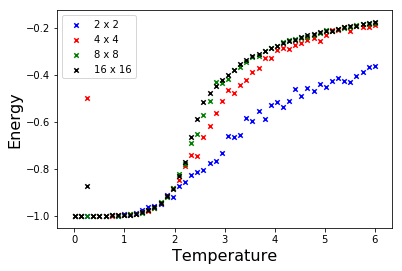

In [57]:
fig=plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(T, E2, s=20, c='b', marker="x", label='2 x 2')
ax1.scatter(T, E4, s=20, c='r', marker="x", label='4 x 4')
ax1.scatter(T, E8, s=20, c='g', marker="x", label='8 x 8')
ax1.scatter(T, E16, s=20, c='black', marker="x", label='16 x 16')
plt.xlabel ("Temperature", fontsize = 16)
plt.ylabel ("Energy", fontsize = 16)
plt.legend(loc='upper left');
plt.show()



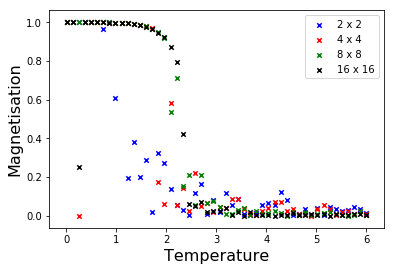

In [58]:
fig=plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(T, abs(M2), s=20, c='b', marker="x", label='2 x 2')
ax2.scatter(T, abs(M4), s=20, c='r', marker="x", label='4 x 4')
ax2.scatter(T, abs(M8), s=20, c='g', marker="x", label='8 x 8')
ax2.scatter(T, abs(M16), s=20, c='black', marker="x", label='16 x 16')
plt.xlabel ("Temperature", fontsize = 16)
plt.ylabel ("Magnetisation", fontsize = 16)
plt.legend(loc='upper right');
plt.show()

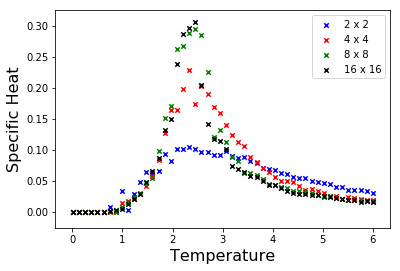

In [59]:
fig=plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(T, C2, s=20, c='b', marker="x", label='2 x 2')
ax2.scatter(T, C4, s=20, c='r', marker="x", label='4 x 4')
ax2.scatter(T, C8, s=20, c='g', marker="x", label='8 x 8')
ax2.scatter(T, C16, s=20, c='black', marker="x", label='16 x 16')
plt.xlabel ("Temperature", fontsize = 16)
plt.ylabel ("Specific Heat", fontsize = 16)
plt.legend(loc='upper right');
plt.show()

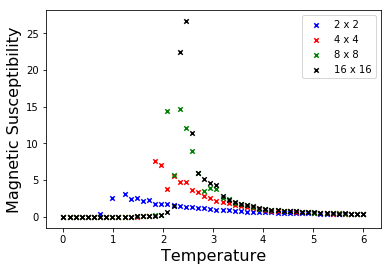

In [60]:
fig=plt.figure()
ax2 = fig.add_subplot(111)
ax2.scatter(T, S2, s=20, c='b', marker="x", label='2 x 2')
ax2.scatter(T, S4, s=20, c='r', marker="x", label='4 x 4')
ax2.scatter(T, S8, s=20, c='g', marker="x", label='8 x 8')
ax2.scatter(T, S16, s=20, c='black', marker="x", label='16 x 16')
plt.xlabel ("Temperature", fontsize = 16)
plt.ylabel ("Magnetic Susceptibility", fontsize = 16)
plt.legend(loc='upper right');
plt.show()